In [3]:
source('helpers.R')

loadLibraries()

In [4]:
x = loadData()
df.combined = x$combined
df.train = x$train
df.test = x$test

In [64]:
slim_df = get_slim_df(df.combined, 'EnclosedPorch')
peek_tibble(slim_df)

LotFrontage Factor FactorIsNotZero
1          65      0           FALSE
2          80      0           FALSE
3          68      0           FALSE

In [107]:
nonzero_df = get_nonzero_factor_df(slim_df)
dim(nonzero_df)
peek_tibble(nonzero_df)

[1] 399  10

LotFrontage Factor FactorSqrt FactorLog predicted resudials predictedSqrt
1          60    272   16.49242  2.434569  74.70714 -14.70714      74.29444
2          51    205   14.31782  2.311754  70.43495 -19.43495      70.91648
3          57    205   14.31782  2.311754  70.43495 -13.43495      70.91648
  resudialsSqrt predictedLog resudialsLog
1     -14.29444     72.46708    -12.46708
2     -19.91648     70.41446    -19.41446
3     -13.91648     70.41446    -13.41446

In [106]:
nonzero_df2 = get_nonzero_factor_df2(slim_df)
dim(nonzero_df2)
peek_tibble(nonzero_df2)

[1] 1197    5

LotFrontage transform value  resudial predicted
1          60    Factor   272 -14.70714  74.70714
2          51    Factor   205 -19.43495  70.43495
3          57    Factor   205 -13.43495  70.43495

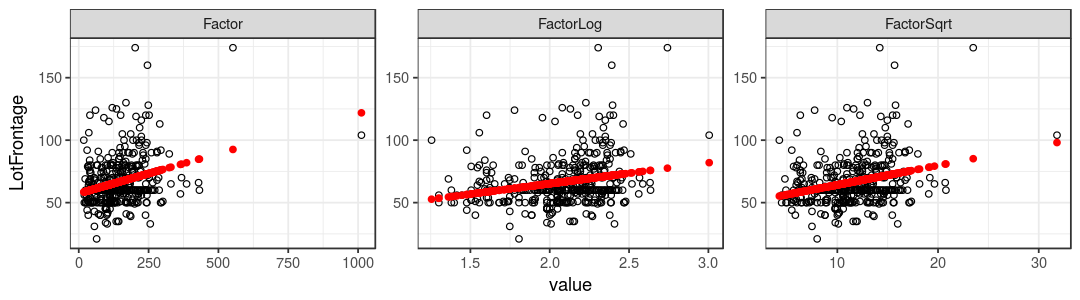

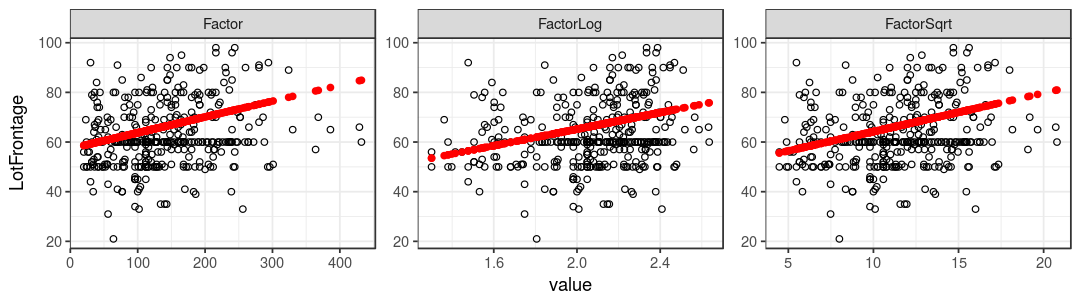

In [160]:
options(repr.plot.width = 9, repr.plot.height = 2.5)

ggplot(nonzero_df2, aes(x=value, y=LotFrontage)) +
    geom_point(shape=1) +
    geom_point(aes(x=value, y=predicted), color = "red") +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()

ggplot(nonzero_df2 %>% filter(LotFrontage < 100), aes(x=value, y=LotFrontage)) +
    geom_point(shape=1) +
    geom_point(aes(x=value, y=predicted), color = "red") +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()

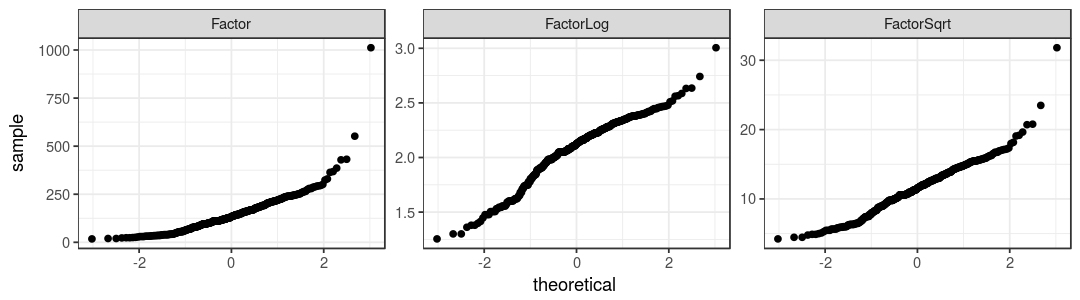

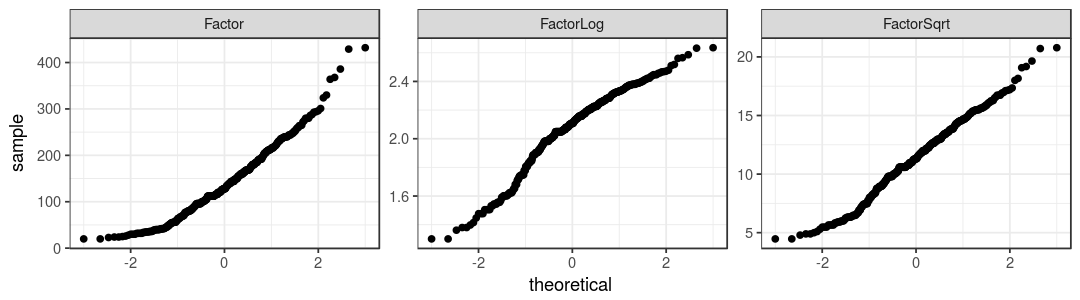

In [161]:
ggplot(nonzero_df2, aes(sample=value)) +
     stat_qq() +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()

ggplot(nonzero_df2 %>% filter(LotFrontage < 100), aes(sample=value)) +
     stat_qq() +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()

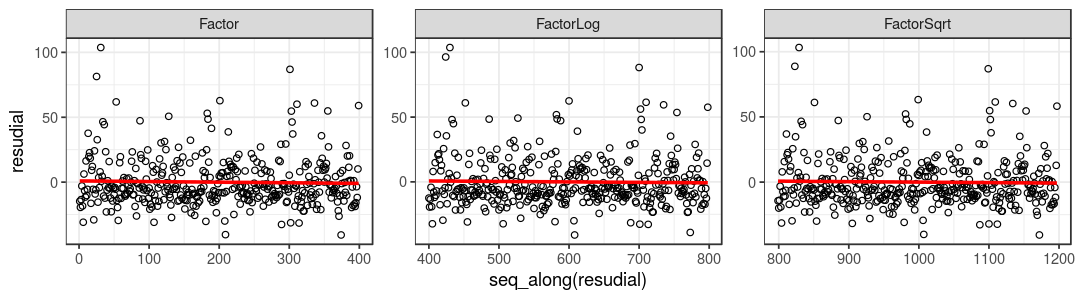

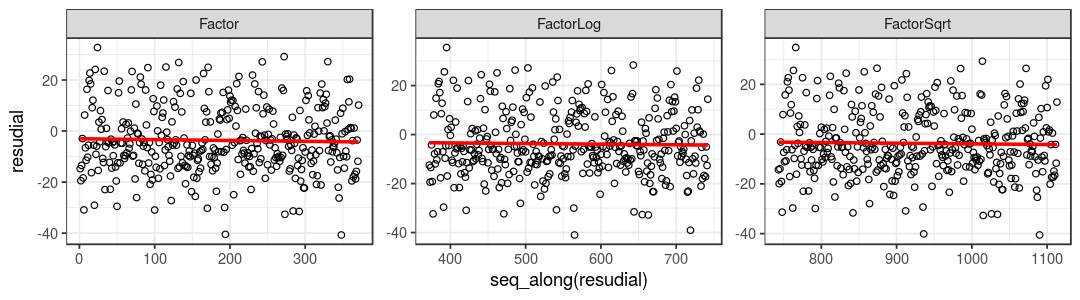

In [162]:
ggplot(nonzero_df2, aes(x=seq_along(resudial), y=resudial)) +
    geom_point(shape=1) +
    geom_smooth(method = "lm", se = FALSE, color = "red") +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()

ggplot(nonzero_df2 %>% filter(LotFrontage < 100), aes(x=seq_along(resudial), y=resudial)) +
    geom_point(shape=1) +
    geom_smooth(method = "lm", se = FALSE, color = "red") +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()

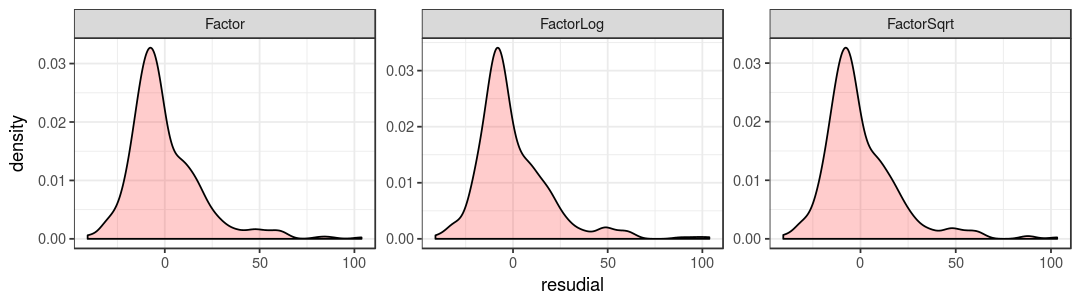

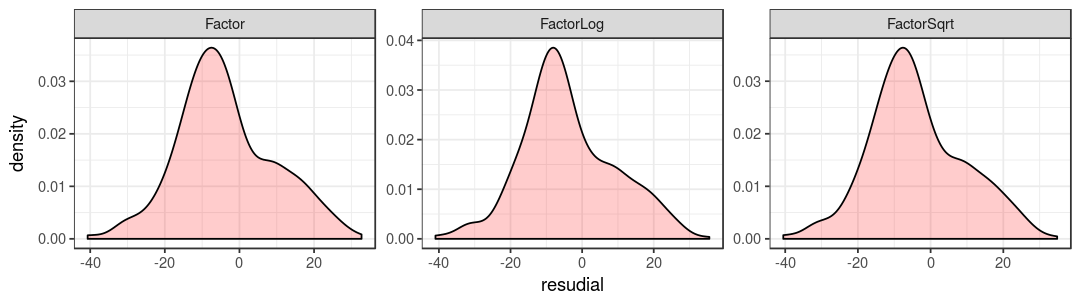

In [163]:
ggplot(nonzero_df2, aes(resudial)) +
    geom_density(fill = "red", alpha = 0.2) +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()

ggplot(nonzero_df2 %>% filter(LotFrontage < 100), aes(resudial)) +
    geom_density(fill = "red", alpha = 0.2) +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()

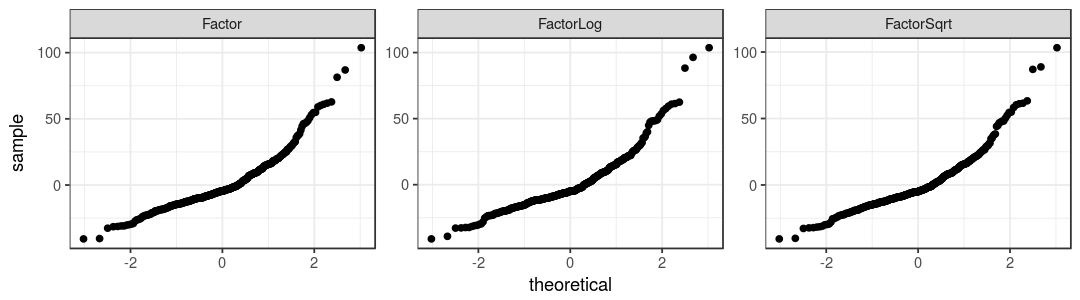

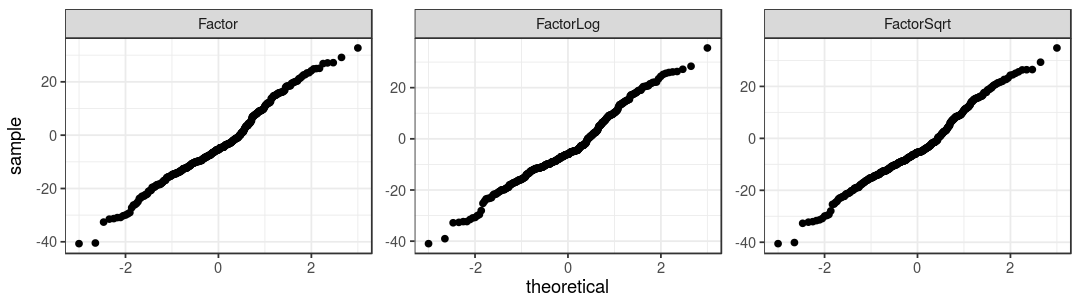

In [164]:
ggplot(nonzero_df2, aes(sample=resudial)) +
    stat_qq() +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()

ggplot(nonzero_df2 %>% filter(LotFrontage < 100), aes(sample=resudial)) +
    stat_qq() +
    facet_wrap(~transform, ncol=3,scales = "free") +
    theme_bw()